# Data pre-processing

In [117]:
import glob
import pandas as pd
import os
import numpy as np
from sklearn.metrics import mean_squared_error

In [118]:
ORIGINAL_DIR = "../Original-Data"
ANALYSIS_DIR = "../Analysis-Data"

In [119]:
all_files = glob.glob(os.path.join(ORIGINAL_DIR,"*2017.csv")) 
all_data = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [120]:
all_data.head()

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-04-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,92.0,101906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,92.0,101869.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,94.0,101837.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,92.0,101834.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-01T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.0,94.0,101832.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
pm10_df = all_data.filter(regex='UTC time|pm10')
pm10_df.shape

(8593, 57)

In [122]:
pm10_df.head()

,UTC time,3_pm10,140_pm10,142_pm10,147_pm10,169_pm10,170_pm10,171_pm10,172_pm10,173_pm10,...,225_pm10,226_pm10,227_pm10,228_pm10,263_pm10,622_pm10,713_pm10,808_pm10,857_pm10,895_pm10
0,2017-04-01T00:00:00,NaN,104.0,NaN,94.0,71.0,82.0,86.0,90.0,79.0,...,73.0,53.0,82.0,89.0,73.0,78.0,NaN,NaN,NaN,NaN
1,2017-04-01T01:00:00,NaN,107.0,NaN,99.0,70.0,77.0,78.0,88.0,76.0,...,70.0,46.0,87.0,57.0,51.0,83.0,NaN,NaN,NaN,NaN
2,2017-04-01T02:00:00,NaN,98.0,NaN,103.0,75.0,73.0,73.0,89.0,77.0,...,66.0,35.0,85.0,50.0,47.0,91.0,NaN,NaN,NaN,NaN
3,2017-04-01T03:00:00,NaN,93.0,NaN,100.0,78.0,80.0,69.0,90.0,66.0,...,64.0,33.0,83.0,60.0,50.0,92.0,NaN,NaN,NaN,NaN
4,2017-04-01T04:00:00,NaN,89.0,NaN,101.0,71.0,87.0,69.0,90.0,69.0,...,61.0,37.0,79.0,69.0,55.0,95.0,NaN,NaN,NaN,NaN


In [123]:
#According to 'Tidy data' rules
pm10_df_with_id = pd.DataFrame(columns=['UTC time', 'pm10', 'id'])
for col_name in pm10_df.iloc[:, 1:]:
    df_with_id = pd.DataFrame(columns=['UTC time', 'pm10', 'id'])
    df_with_id['UTC time'] = pm10_df['UTC time']
    df_with_id['pm10'] = pm10_df[col_name]
    df_with_id['id'] = col_name
    pm10_df_with_id = pm10_df_with_id.append(df_with_id)

In [124]:
pm10_df_with_id.shape

(481208, 3)

In [125]:
pm10_df_with_id.head()

,UTC time,pm10,id
0,2017-04-01T00:00:00,NaN,3_pm10
1,2017-04-01T01:00:00,NaN,3_pm10
2,2017-04-01T02:00:00,NaN,3_pm10
3,2017-04-01T03:00:00,NaN,3_pm10
4,2017-04-01T04:00:00,NaN,3_pm10


In [126]:
pm10_df_with_id.id = pm10_df_with_id.id.str.replace('_pm10','').astype(int)

In [127]:
pm10_df_with_id.head()

,UTC time,pm10,id
0,2017-04-01T00:00:00,NaN,3
1,2017-04-01T01:00:00,NaN,3
2,2017-04-01T02:00:00,NaN,3
3,2017-04-01T03:00:00,NaN,3
4,2017-04-01T04:00:00,NaN,3


In [128]:
sensors = pd.read_csv(f"{ORIGINAL_DIR}/sensor_locations.csv")
sensors.head()

,id,latitude,longitude
0,3,50.057748,19.961375
1,140,50.057747,19.961374
2,142,50.084816,19.878066
3,147,50.048924,19.962262
4,169,50.048699,20.101569


In [129]:
cleaned_data = (pm10_df_with_id.merge(sensors, left_on='id', right_on='id')
       .reindex(columns=['UTC time', 'pm10', 'id', 'latitude', 'longitude']))

In [130]:
cleaned_data.head()

,UTC time,pm10,id,latitude,longitude
0,2017-04-01T00:00:00,NaN,3,50.057748,19.961375
1,2017-04-01T01:00:00,NaN,3,50.057748,19.961375
2,2017-04-01T02:00:00,NaN,3,50.057748,19.961375
3,2017-04-01T03:00:00,NaN,3,50.057748,19.961375
4,2017-04-01T04:00:00,NaN,3,50.057748,19.961375


In [131]:
#Remove unnecessary columns
cleaned_data.drop('id', inplace=True, axis=1)

In [132]:
cleaned_data.head()

,UTC time,pm10,latitude,longitude
0,2017-04-01T00:00:00,NaN,50.057748,19.961375
1,2017-04-01T01:00:00,NaN,50.057748,19.961375
2,2017-04-01T02:00:00,NaN,50.057748,19.961375
3,2017-04-01T03:00:00,NaN,50.057748,19.961375
4,2017-04-01T04:00:00,NaN,50.057748,19.961375


In [133]:
cleaned_data['pm10'].isnull().sum()

92832

In [134]:
#Remove missing rows
cleaned_data.dropna(subset = ["pm10"], inplace=True)

In [135]:
cleaned_data.rename(columns={'UTC time': 'datetime'}, inplace=True)
cleaned_data.datetime = pd.to_datetime(cleaned_data.datetime)
cleaned_data.head()

,datetime,pm10,latitude,longitude
2041,2017-02-01 00:00:00,155.0,50.057748,19.961375
2042,2017-02-01 01:00:00,165.0,50.057748,19.961375
2043,2017-02-01 02:00:00,170.0,50.057748,19.961375
2044,2017-02-01 03:00:00,186.0,50.057748,19.961375
2045,2017-02-01 04:00:00,191.0,50.057748,19.961375


In [136]:
cleaned_data.shape

(388376, 4)

In [137]:
cleaned_data['datetime'].value_counts()

2017-03-17 13:00:00    50
2017-03-23 11:00:00    50
2017-03-23 21:00:00    50
2017-03-20 05:00:00    50
2017-02-28 21:00:00    50
                       ..
2017-06-13 14:00:00    17
2017-06-21 15:00:00     8
2017-06-21 17:00:00     8
2017-06-21 16:00:00     8
2017-06-21 14:00:00     8
Name: datetime, Length: 8593, dtype: int64

# Algorithm

In [138]:
from photutils.utils import ShepardIDWInterpolator as idw
from sklearn.model_selection import train_test_split
from typing import NewType
import matplotlib.pyplot as plt

In [139]:
def get_data(dataframe, time):
    return dataframe.loc[dataframe.datetime == time]

**Hyperparameters tuning**

The Shepard interpolator has an available number of parameters that are listed in the documentation.

https://photutils.readthedocs.io/en/stable/api/photutils.utils.ShepardIDWInterpolator.html

**We will adjust the following parameters:**

_n\_neighbors_ -> The maximum number of nearest neighbors to use during the interpolation

_power_ -> The power of the inverse distance used for the interpolation weights.

I chose _2017-03-17 13:00:00_  because it contains the most data (50 samples)

In [140]:
MAX_NEIGHBORS = 15
POWER_RANGE = np.arange(0.1, 5.0, 0.2)

In [141]:
selected = get_data(cleaned_data, '2017-03-17 13:00:00')

In [142]:
X_train, X_test, y_train, y_test = train_test_split(selected[["latitude","longitude"]].values, 
                                                    selected["pm10"].values, test_size=0.2, random_state=42)

In [143]:
# Run idw interpolator
f = idw(X_train, y_train)

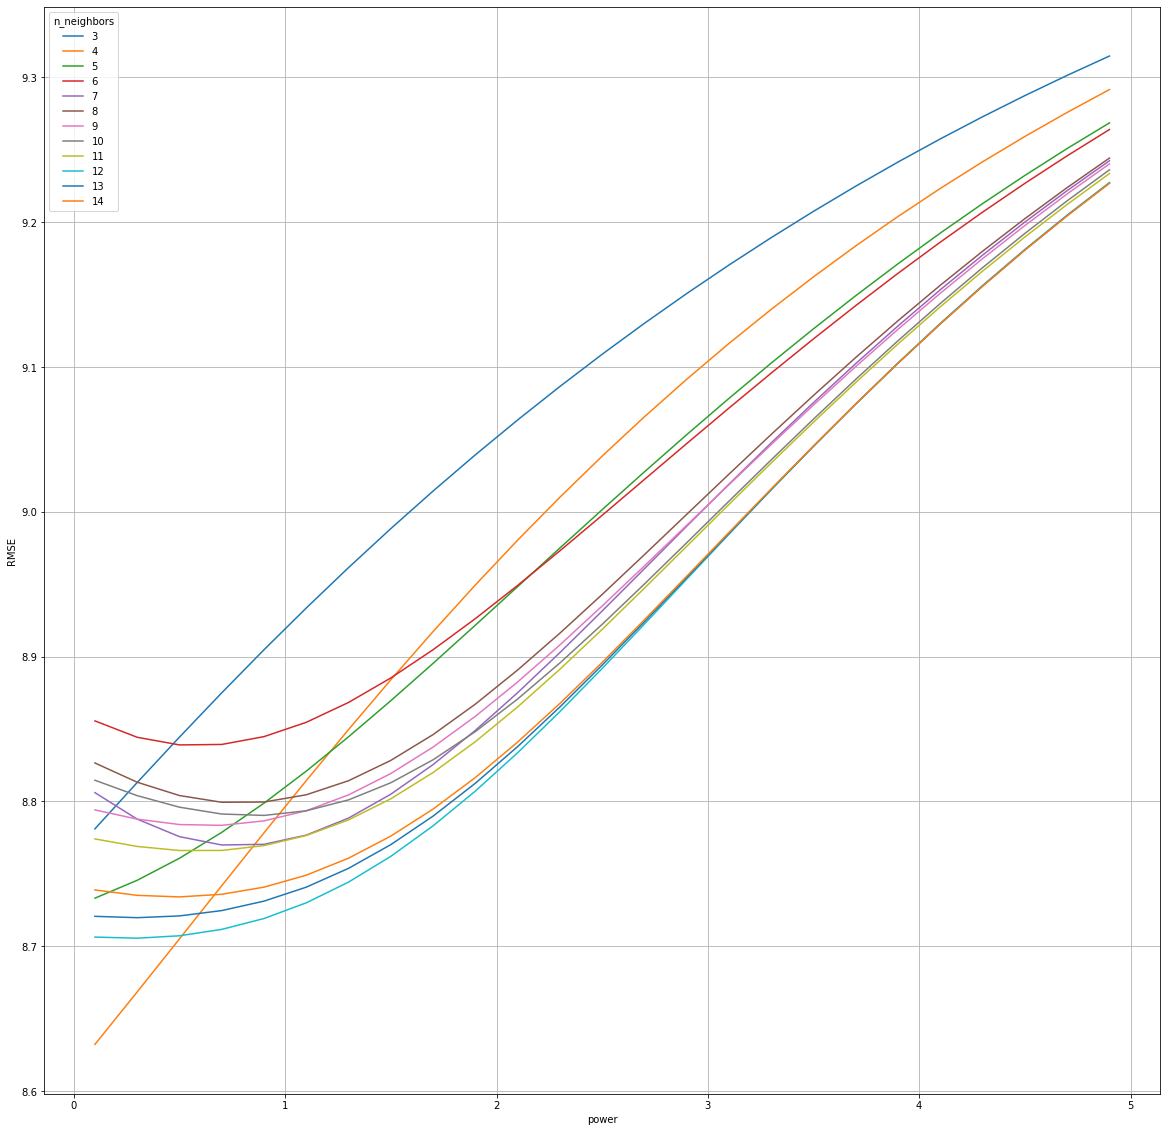

In [144]:
for n_neighbors in range(3, MAX_NEIGHBORS):
    power_list=[]
    rmse_list=[]
    for power in POWER_RANGE:
        predictions = f(X_test, n_neighbors = n_neighbors, power = power)
        rmse = mean_squared_error(y_test, predictions, squared = False)
        power_list.append(power)
        rmse_list.append(rmse)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.plot(power_list, rmse_list, label=n_neighbors)
plt.grid()
plt.xlabel('power')
plt.ylabel('RMSE')
plt.legend(title="n_neighbors")
plt.show()

We can notice that the model achieves satisfactory results for n_neighbors equal to 4 and the model is not very complex.

_We will now check which value of the power parameter will produce the best results for n_neihbors equal to 4._

n_neighbors: 3
power 		 rmse
0.1 		 8.7810
0.3 		 8.8130
0.5 		 8.8444
0.7 		 8.8750
0.9 		 8.9047
1.1 		 8.9336
1.3 		 8.9615
1.5 		 8.9884
1.7 		 9.0144
1.9 		 9.0394
2.1 		 9.0634
2.3 		 9.0866
2.5 		 9.1088
2.7 		 9.1302
2.9 		 9.1508
3.1 		 9.1705
3.3 		 9.1894
3.5 		 9.2076
3.7 		 9.2250
3.9 		 9.2416
4.1 		 9.2576
4.3 		 9.2729
4.5 		 9.2875
4.7 		 9.3015
4.9 		 9.3148


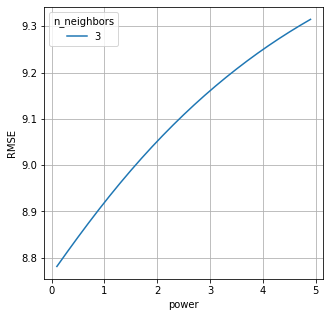

n_neighbors: 4
power 		 rmse
0.1 		 8.6322
0.3 		 8.6684
0.5 		 8.7050
0.7 		 8.7418
0.9 		 8.7783
1.1 		 8.8143
1.3 		 8.8496
1.5 		 8.8840
1.7 		 8.9173
1.9 		 8.9495
2.1 		 8.9804
2.3 		 9.0101
2.5 		 9.0385
2.7 		 9.0657
2.9 		 9.0916
3.1 		 9.1163
3.3 		 9.1399
3.5 		 9.1623
3.7 		 9.1837
3.9 		 9.2040
4.1 		 9.2234
4.3 		 9.2418
4.5 		 9.2593
4.7 		 9.2759
4.9 		 9.2917


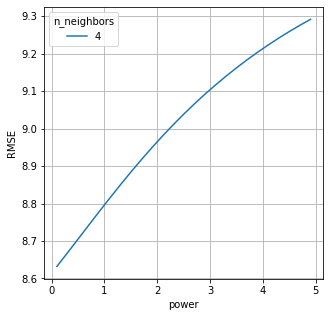

n_neighbors: 5
power 		 rmse
0.1 		 8.7331
0.3 		 8.7455
0.5 		 8.7607
0.7 		 8.7786
0.9 		 8.7988
1.1 		 8.8209
1.3 		 8.8446
1.5 		 8.8695
1.7 		 8.8954
1.9 		 8.9217
2.1 		 8.9483
2.3 		 8.9750
2.5 		 9.0015
2.7 		 9.0276
2.9 		 9.0533
3.1 		 9.0784
3.3 		 9.1028
3.5 		 9.1264
3.7 		 9.1493
3.9 		 9.1714
4.1 		 9.1926
4.3 		 9.2129
4.5 		 9.2324
4.7 		 9.2509
4.9 		 9.2686


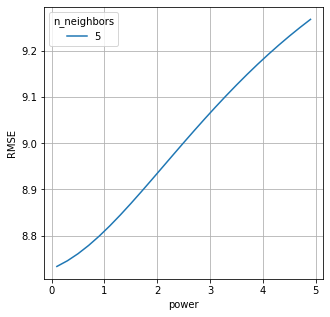

n_neighbors: 6
power 		 rmse
0.1 		 8.8556
0.3 		 8.8443
0.5 		 8.8390
0.7 		 8.8393
0.9 		 8.8447
1.1 		 8.8546
1.3 		 8.8683
1.5 		 8.8853
1.7 		 8.9048
1.9 		 8.9262
2.1 		 8.9492
2.3 		 8.9731
2.5 		 8.9976
2.7 		 9.0224
2.9 		 9.0471
3.1 		 9.0717
3.3 		 9.0958
3.5 		 9.1195
3.7 		 9.1425
3.9 		 9.1648
4.1 		 9.1863
4.3 		 9.2070
4.5 		 9.2269
4.7 		 9.2459
4.9 		 9.2640


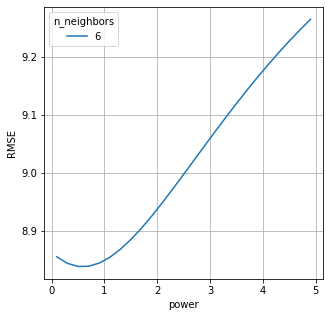

n_neighbors: 7
power 		 rmse
0.1 		 8.8060
0.3 		 8.7877
0.5 		 8.7756
0.7 		 8.7699
0.9 		 8.7703
1.1 		 8.7767
1.3 		 8.7885
1.5 		 8.8050
1.7 		 8.8254
1.9 		 8.8491
2.1 		 8.8751
2.3 		 8.9028
2.5 		 8.9315
2.7 		 8.9608
2.9 		 8.9901
3.1 		 9.0191
3.3 		 9.0477
3.5 		 9.0755
3.7 		 9.1024
3.9 		 9.1284
4.1 		 9.1534
4.3 		 9.1773
4.5 		 9.2001
4.7 		 9.2219
4.9 		 9.2425


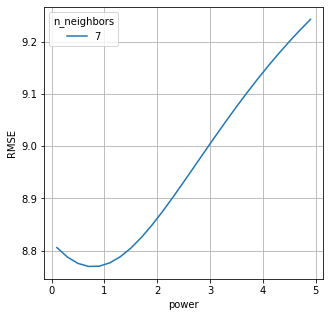

n_neighbors: 8
power 		 rmse
0.1 		 8.8265
0.3 		 8.8132
0.5 		 8.8040
0.7 		 8.7994
0.9 		 8.7995
1.1 		 8.8046
1.3 		 8.8143
1.5 		 8.8283
1.7 		 8.8461
1.9 		 8.8672
2.1 		 8.8907
2.3 		 8.9162
2.5 		 8.9429
2.7 		 8.9704
2.9 		 8.9983
3.1 		 9.0260
3.3 		 9.0535
3.5 		 9.0804
3.7 		 9.1067
3.9 		 9.1320
4.1 		 9.1565
4.3 		 9.1800
4.5 		 9.2025
4.7 		 9.2239
4.9 		 9.2443


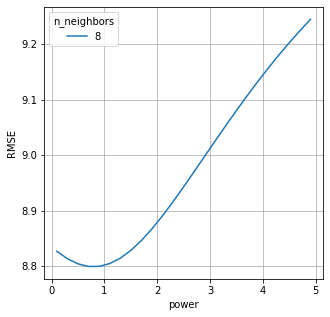

n_neighbors: 9
power 		 rmse
0.1 		 8.7941
0.3 		 8.7877
0.5 		 8.7840
0.7 		 8.7835
0.9 		 8.7865
1.1 		 8.7935
1.3 		 8.8045
1.5 		 8.8193
1.7 		 8.8375
1.9 		 8.8588
2.1 		 8.8825
2.3 		 8.9081
2.5 		 8.9350
2.7 		 8.9627
2.9 		 8.9907
3.1 		 9.0188
3.3 		 9.0465
3.5 		 9.0738
3.7 		 9.1004
3.9 		 9.1261
4.1 		 9.1510
4.3 		 9.1749
4.5 		 9.1978
4.7 		 9.2196
4.9 		 9.2403


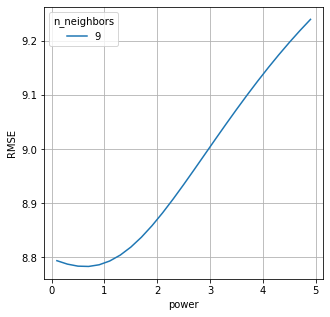

n_neighbors: 10
power 		 rmse
0.1 		 8.8146
0.3 		 8.8040
0.5 		 8.7960
0.7 		 8.7913
0.9 		 8.7903
1.1 		 8.7935
1.3 		 8.8010
1.5 		 8.8129
1.7 		 8.8287
1.9 		 8.8482
2.1 		 8.8707
2.3 		 8.8956
2.5 		 8.9223
2.7 		 8.9502
2.9 		 8.9787
3.1 		 9.0074
3.3 		 9.0360
3.5 		 9.0641
3.7 		 9.0916
3.9 		 9.1182
4.1 		 9.1440
4.3 		 9.1687
4.5 		 9.1923
4.7 		 9.2148
4.9 		 9.2362


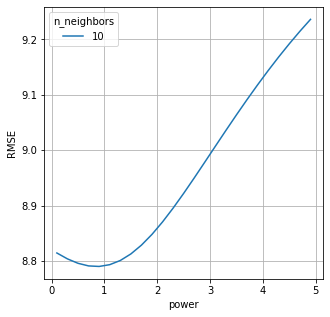

n_neighbors: 11
power 		 rmse
0.1 		 8.7741
0.3 		 8.7689
0.5 		 8.7661
0.7 		 8.7661
0.9 		 8.7695
1.1 		 8.7764
1.3 		 8.7872
1.5 		 8.8018
1.7 		 8.8199
1.9 		 8.8413
2.1 		 8.8652
2.3 		 8.8913
2.5 		 8.9188
2.7 		 8.9473
2.9 		 8.9762
3.1 		 9.0051
3.3 		 9.0338
3.5 		 9.0620
3.7 		 9.0894
3.9 		 9.1160
4.1 		 9.1416
4.3 		 9.1663
4.5 		 9.1898
4.7 		 9.2123
4.9 		 9.2337


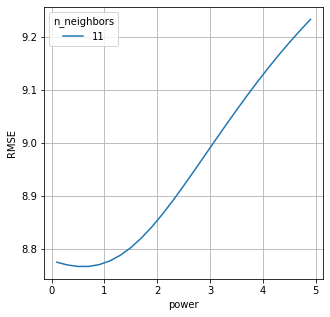

n_neighbors: 12
power 		 rmse
0.1 		 8.7063
0.3 		 8.7055
0.5 		 8.7072
0.7 		 8.7116
0.9 		 8.7191
1.1 		 8.7299
1.3 		 8.7443
1.5 		 8.7620
1.7 		 8.7831
1.9 		 8.8071
2.1 		 8.8336
2.3 		 8.8620
2.5 		 8.8918
2.7 		 8.9225
2.9 		 8.9535
3.1 		 8.9846
3.3 		 9.0152
3.5 		 9.0453
3.7 		 9.0746
3.9 		 9.1029
4.1 		 9.1302
4.3 		 9.1563
4.5 		 9.1813
4.7 		 9.2050
4.9 		 9.2274


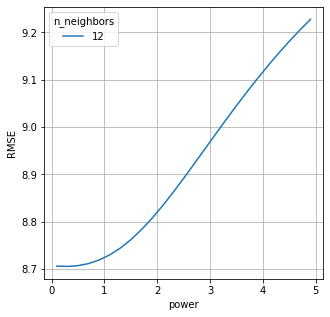

n_neighbors: 13
power 		 rmse
0.1 		 8.7206
0.3 		 8.7197
0.5 		 8.7209
0.7 		 8.7246
0.9 		 8.7311
1.1 		 8.7408
1.3 		 8.7537
1.5 		 8.7701
1.7 		 8.7898
1.9 		 8.8125
2.1 		 8.8378
2.3 		 8.8652
2.5 		 8.8942
2.7 		 8.9241
2.9 		 8.9546
3.1 		 8.9852
3.3 		 9.0155
3.5 		 9.0453
3.7 		 9.0745
3.9 		 9.1027
4.1 		 9.1299
4.3 		 9.1560
4.5 		 9.1809
4.7 		 9.2046
4.9 		 9.2271


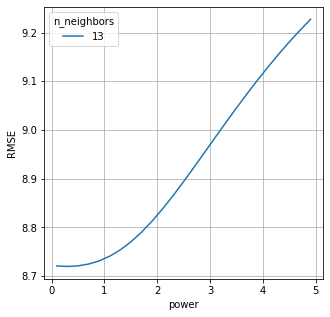

n_neighbors: 14
power 		 rmse
0.1 		 8.7388
0.3 		 8.7351
0.5 		 8.7340
0.7 		 8.7358
0.9 		 8.7408
1.1 		 8.7490
1.3 		 8.7608
1.5 		 8.7760
1.7 		 8.7947
1.9 		 8.8165
2.1 		 8.8410
2.3 		 8.8677
2.5 		 8.8960
2.7 		 8.9255
2.9 		 8.9555
3.1 		 8.9858
3.3 		 9.0159
3.5 		 9.0456
3.7 		 9.0745
3.9 		 9.1027
4.1 		 9.1298
4.3 		 9.1558
4.5 		 9.1808
4.7 		 9.2045
4.9 		 9.2270


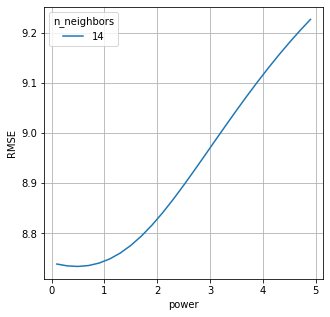

In [145]:
for n_neighbors in range(3, MAX_NEIGHBORS):
    power_list=[]
    rmse_list=[]
    print(f"n_neighbors: {n_neighbors}")
    print(f"power \t\t rmse")
    for power in POWER_RANGE:
        predictions = f(X_test, n_neighbors = n_neighbors, power = power)
        rmse = mean_squared_error(y_test, predictions, squared = False)
        power_list.append(power)
        rmse_list.append(rmse)
        print(f"{power:.1f} \t\t {rmse:.4f}")
    plt.rcParams["figure.figsize"] = (5,5)
    plt.plot(power_list, rmse_list, label=n_neighbors)
    plt.grid()
    plt.xlabel('power')
    plt.ylabel('RMSE')
    plt.legend(title="n_neighbors")
    plt.show()

**Summing up the best interpolation result was obtained for the n-neighbors parameters equal to 4 and for the variable power equal to 0.1.**